# Asteroid Belt Kirkwood Gaps

Figure 3.1 from Chapter 3 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Histogram of the number of known asteroids as a function of orbital semimajor axis a; the histogram bin width is Δa = 0.004 au. Vertical dotted lines correspond to the 4:1, 3:1, 5:2, 7:3, 2:1, and 3:2 interior resonances with Jupiter.

In [2]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [3]:
plotFile = 'Fig3_1.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Asteroid data

Asteroid data are in a CSV file pre-selected from the MPCORB database for all asteroids in the Main Belt
plus the Hungarias, Hildas, and Jupiter Trojans brighter than H=16 have been selected.  This is faster
than reading all roughly 1.3 million entries in the full MPCORB database.

In [4]:
mpcFile = 'Asteroids/MPC_Kirkwood.csv' 

data = pd.read_csv(mpcFile,comment='#')

aBin = np.array(data['a'])
count = np.array(data['count'])

aMin = 1.7
aMax = 4.1 

cMin = 0.0
cMax = 1.05*np.max(count)

## Jupiter orbital data

Data from the NASA/JPL Solar System Dynamics database

In [5]:
aJup = 5.20288700 # au
eJup = 0.04838624
PJup = 4332.820129/365.25 # years
iJup = 1.30439695

# Jupiter interior mean-motion resonances

aJ41 = (1.0*PJup/4.0)**(2./3.)
aJ31 = (1.0*PJup/3.0)**(2./3.)
aJ52 = (2.0*PJup/5.0)**(2./3.)
aJ73 = (3.0*PJup/7.0)**(2./3.)
aJ21 = (1.0*PJup/2.0)**(2./3.)
aJ32 = (2.0*PJup/3.0)**(2./3.)

## Figure 3.1

Plot a histogram of the number of asteroids vs. semimajor axis in 0.004au bins. Draw dashed vertical
lines at the main interior resonances with Jupiter.

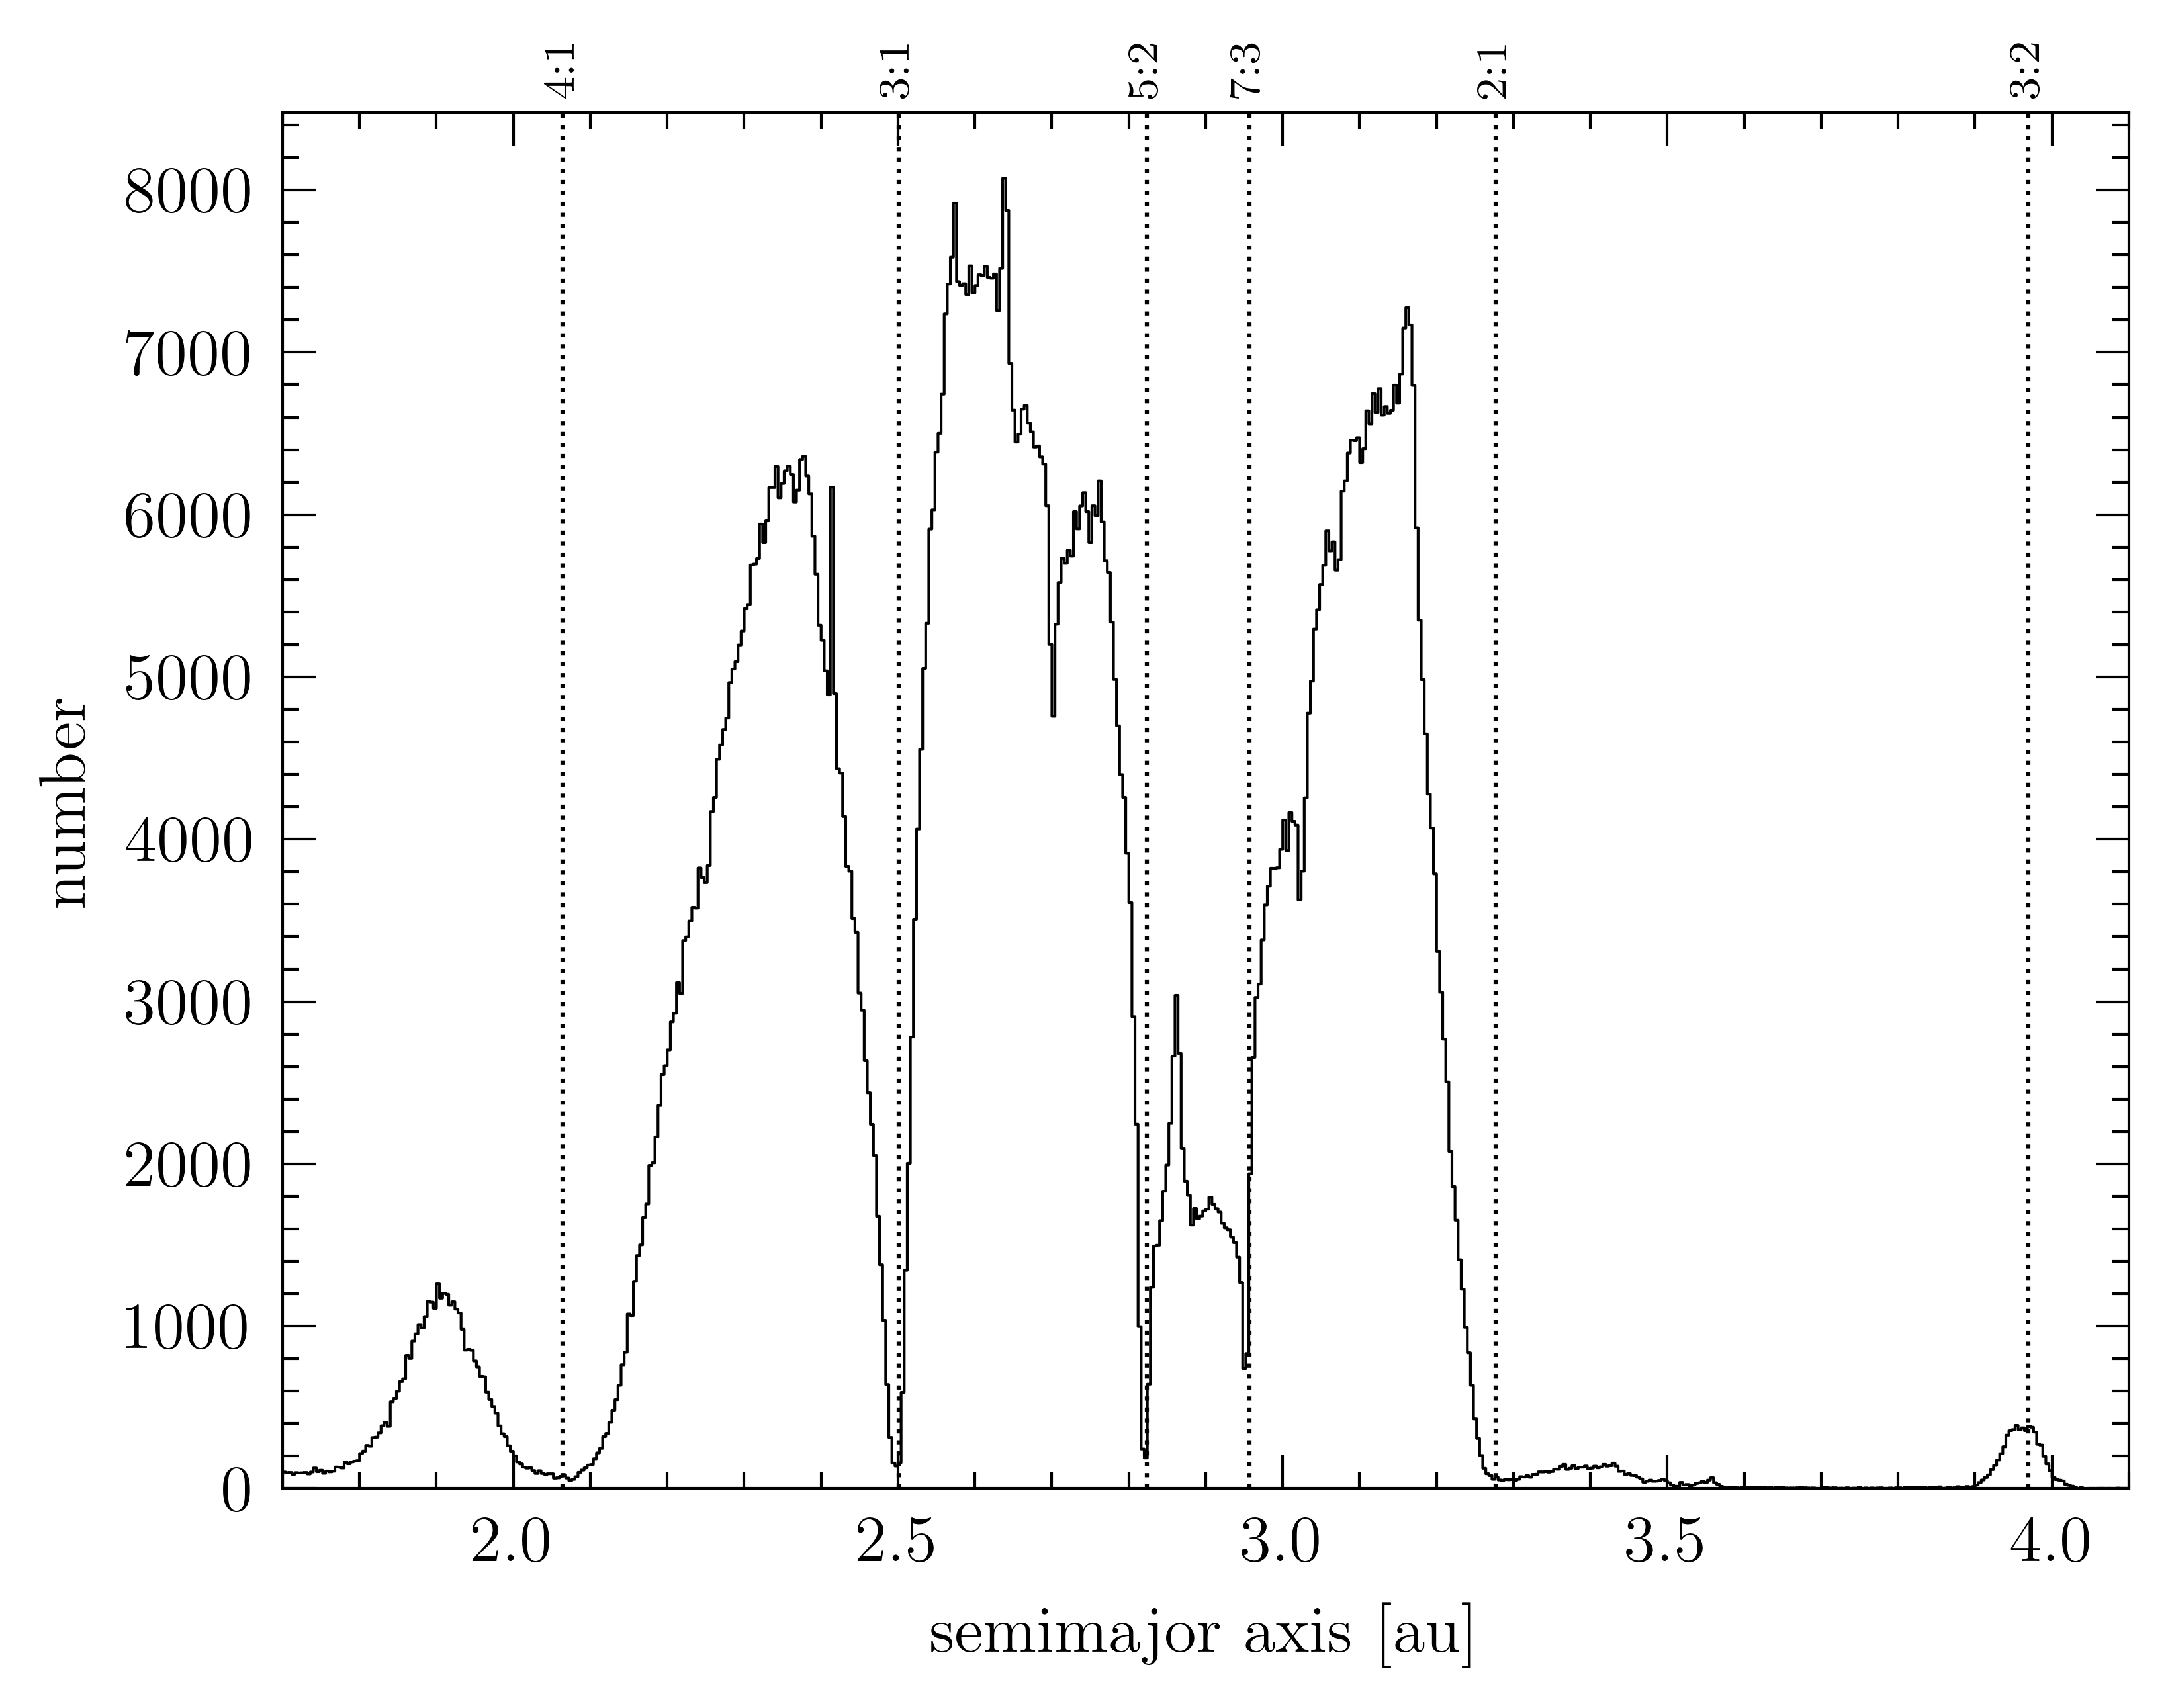

In [6]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(aMin,aMax)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_xlabel(r'semimajor axis [au]',fontsize=axisFontSize)

ax.set_ylim(cMin,cMax)
ax.yaxis.set_major_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(MultipleLocator(200))
ax.set_ylabel(r'number',fontsize=axisFontSize)

ax.step(aBin,count,'-',lw=0.5,color='black',zorder=10)

# Jupiter interior resonances

ax.vlines([aJ41,aJ31,aJ52,aJ73,aJ21,aJ32],cMin,cMax,ls=[':'],colors=['black'],lw=0.75,zorder=5)
ax.text(aJ41,1.01*cMax,'4:1',ha='center',va='bottom',fontsize=8,color='black',rotation=90)
ax.text(aJ31,1.01*cMax,'3:1',ha='center',va='bottom',fontsize=8,color='black',rotation=90)
ax.text(aJ52,1.01*cMax,'5:2',ha='center',va='bottom',fontsize=8,color='black',rotation=90)
ax.text(aJ73,1.01*cMax,'7:3',ha='center',va='bottom',fontsize=8,color='black',rotation=90)
ax.text(aJ21,1.01*cMax,'2:1',ha='center',va='bottom',fontsize=8,color='black',rotation=90)
ax.text(aJ32,1.01*cMax,'3:2',ha='center',va='bottom',fontsize=8,color='black',rotation=90)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')